# Programming Assignment 3 - Logistic Regression (50 points)

For this assignment, you will be using the Breast Cancer Wisconsin  dataset to create a classifier that can help diagnose patients. 

You task is to determine if you can use logistic regression with the features to predict if a tumor is benign or malignant.  This is an important task, as if save lives.

``Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.''

The ten real-valued features compute different measurements on the cell nucleus.  The official documentation describes the features as: 

*  radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

## Before you start

For this semester, the teaching staff of this course will be using Autograder to grade programming assignment. Here are three things we would like you to know before starting. `PLEASE READ CAREFULLY.` Otherwise, you might lose points on some questions.

* If you see any blocks containing statements like `grader.check("Qxx")`, please `do not modify` them. You can add new cells to the notebook, but just make sure there is `no other cells` between the answer cells containing tag `# TODO Qxx` and grading cells like 'grader.check("Qxx")`. 

* If the instructions say that you are required to use certain names for output variables, please `follow the instructions`, and you are not supposed to change the names of any given variables. You can still create new variables, but don't forget to `assign the output variables to correct values`. If the `type` of a output variable is specified, make sure the type of the variable is correct.

* You can use print statements to print out results through out the notebook. However, if you have any `print statements within functions`, please make sure putting them `in comments` before you submit.

* Please note for questions that require you to plot, please **_DO NOT MODIFY_** statements like `plt.show(block=False)`. Changing the statement would block the execution of autograder and you might lose points on that question.

* Please `APPEND YOUR NYU NETID` to the name your submission (for example, name your submission as "HW1_prog_abc12345.ipynb" when you submit on Gradescope, and replace <abc1234> with your NYU NetID). 

Good luck with programming assignment 4!

# Start by importing the libraries

In [4]:
# Import Important Libraries
import sklearn
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
# import math

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data set.

In the below code cell, you will load the data from sklearn using the method given. Check import statements and use the given function

In [5]:
# TODO Q01
cancer = load_breast_cancer()   # type in load_breast_cancer()

In [6]:
grader.check("Q01")

NameError: name 'grader' is not defined

In [7]:
# VERIFY - Print the shape of data and target
print('Q01 - cancer.target.shape: ', cancer.target.shape)
print('Q01 - cancer.data.shape: ', cancer.data.shape)

Q01 - cancer.target.shape:  (569,)
Q01 - cancer.data.shape:  (569, 30)


In [8]:
# Read through the description of the dataset by uncommenting the line of code below
# print(cancer.DESCR)

# Data Pre-Processing
Scale after splitting the data into train and test since we will be using gradient ascent. 
* Use `train_test_split` to split the data (`75% train` and `25% test`) to `X_train`, `X_test`, `y_train`, `y_test` with `random_state` of 42
* Reshape `y_train` into 2D array `y_2d_train` and `y_test` into 2D array `y_2d_test`
* Use `preprocessing` to scale the data.  Remember to scale the training data first and then using the same method scale the test dataset.
* Augment the dataset with a column of ones

In [9]:
# TODO Q02
from sklearn.preprocessing import StandardScaler

# splitting
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=42)

# resizing y
y_2d_train = np.ndarray.reshape(y_train, (-1, 1))
y_2d_test = np.ndarray.reshape(y_test, (-1, 1))

# scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [10]:
grader.check("Q02")

NameError: name 'grader' is not defined

In [11]:
# VERIFY - Print the shape of X_train and y_2d_train
print('Q02 - X_train.shape: ', X_train.shape)
print('Q02 - y_2d_train.shape: ', y_2d_train.shape)

Q02 - X_train.shape:  (426, 30)
Q02 - y_2d_train.shape:  (426, 1)


In [12]:
# VERIFY - Printing the names of all the features
print('Q02 - cancer.feature_names: ', cancer.feature_names)

Q02 - cancer.feature_names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
# TODO Q03
# Append a column of ones to X_train
# ones is a  vector of shape n,1
ones = np.ones((X_train.shape[0],1))
# Append a column of ones in the beginning of X_train an save in variable X_train_1(<np.ndarray>).
X_train_1 = np.hstack((ones, X_train))

In [14]:
grader.check("Q03")

NameError: name 'grader' is not defined

In [15]:
# VERIFY
print('Q03 - X_train_1.shape: ', X_train_1.shape)
print('Q03 - X_train_1: ', X_train_1)

Q03 - X_train_1.shape:  (426, 31)
Q03 - X_train_1:  [[ 1.         -0.34913849 -1.43851335 ... -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 ...  1.43655962  1.14955889
   1.56911143]
 [ 1.         -0.32931176 -0.21507235 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 1.          0.04739597 -0.56293662 ... -1.23262438 -0.68282718
  -1.261137  ]
 [ 1.         -0.04040808  0.09966199 ...  1.08847951  0.48944465
   1.26159953]
 [ 1.         -0.5502381   0.31264011 ... -0.59582424 -0.29911546
  -0.82948141]]


# Implementing Logistic Regression Using Gradient Ascent

You will perform the following steps:
* write the sigmoid function $\sigma(z)=\frac{1}{1+e^{-z}}$
* initialize ${\bf w}$
* prediction: write the function to compute the probability of every example in $X$ belonging to class one
* write the log likelihood function (see lecture notes for the formula)
* write the gradient ascent algorithm
* plot the likelihood v/s the number of iterations
* predict the class label (i.e. $0,1$) for every example in $X$ for a given ${\bf w}$ and $t$
* Evaluate your hypothesis by using your hypothesis to predict the class of the examples in the test set.  Using these predicted value you will then determine the precision, recall and F1 score of the test set


### Sigmoid function

In [16]:
# TODO Q04
# Write the sigmoid function
def sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-8, 1 - 1e-8)

In [17]:
grader.check("Q04")

NameError: name 'grader' is not defined

In [18]:
# VERIFY - Sigmoid of 0 should be equal to half
print('Q04 - sigmoid(0): ', sigmoid(0))

Q04 - sigmoid(0):  0.5


### Initialize ${\bf w}$

In [19]:
# TODO Q05
# Initialize w_init to a zero matrix with shape (X_train_1.shape[1],1)
w_init = np.zeros((X_train_1.shape[1], 1))

In [20]:
grader.check("Q05")

NameError: name 'grader' is not defined

In [21]:
# VERIFY
print('Q05 - w_init.shape: ', w_init.shape)

Q05 - w_init.shape:  (31, 1)


### Prediction
Finish writing the function, `hypothesis`, that computes the probability of each example in $X$ belonging to class one.  (i.e. $\hat{\bf y}=\sigma(X{\bf w})$

In [22]:
# TODO Q06
# Write the hypothesis function which assumes the design matrix X is augmented with a column of ones
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

In [23]:
grader.check("Q06")

NameError: name 'grader' is not defined

In [24]:
# TODO Q07 
# Compute y_hat(<np.ndarray>) using your hypotheis function with arguments X_train_1 and w_init
y_hat_init = hypothesis(X_train_1,w_init)

In [25]:
grader.check("Q07")

NameError: name 'grader' is not defined

In [26]:
# VERIFY
# print('Q07 - y_hat_init: ', y_hat_init)

### Log Likelihood Function
Write the code to calculate the log likelihood as discussed in the class.

In [27]:
# TODO Q08
# Write the log likelihood function
def log_likelihood(X: np.ndarray, y: np.ndarray, w: np.ndarray):
    preds = hypothesis(X, w)
    term1 = y * np.log(preds)
    term2 = (1-y) * np.log(1-preds)
    combined = term1 + term2
    return np.ndarray.sum(combined)

In [28]:
grader.check("Q08")

NameError: name 'grader' is not defined

In [29]:
# VERIFY - The value should be equal to -295.2806989185367 using X_train_1, y_2d_train, w, X_train_1.shape[0].
print('Q08 - likelihood: ', log_likelihood(X_train_1, y_2d_train, w_init))

Q08 - likelihood:  -295.2806989185367


### Gradient Ascent

In [30]:
# TODO Q09
# Write the gradient ascent function
def Gradient_Ascent(X, y, learning_rate, num_iters):
    # We assume X has been augmented with a column of ones
    
    # Number of training examples.
    N = X.shape[0]
    
    # Initialize w(<np.ndarray>). Zeros vector of shape X.shape[1],1
    w = np.zeros((X.shape[1],1))
    
    # Initiating list to store values of likelihood(<list>) after few iterations.
    log_likelihood_values = []
    
    # Gradient Ascent - local optimization technique
    for i in range(num_iters):
        hyp = hypothesis(X, w)
        gradient = np.dot(X.T, y - hyp)
        w += learning_rate * gradient
        
        # Computing log likelihood of seeing examples for current value of w
        if (i % 10) == 0:
            log_likelihood_values.append(log_likelihood(X, y, w))
            #print(log_likelihood(X, y, w))
        
    return w, log_likelihood_values

In [31]:
grader.check("Q09")

NameError: name 'grader' is not defined

In [32]:
# Please try many different values for the learning rate (including very small values).
learning_rate = 0.001
num_iters = 500
# Calculate w and likelihood values using Gradient_Ascent with X_train_1, y_2d_train
w, log_likelihood_values = Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters)
print(w, log_likelihood_values)

[[ 0.56560253]
 [-0.4828172 ]
 [-0.60288013]
 [-0.44602744]
 [-0.56301683]
 [-0.25655975]
 [ 0.50831595]
 [-0.821336  ]
 [-1.01474361]
 [ 0.16099129]
 [ 0.28425311]
 [-1.28106089]
 [ 0.15848432]
 [-0.77041515]
 [-0.93156936]
 [-0.20062617]
 [ 0.8303779 ]
 [-0.14256347]
 [-0.30279775]
 [ 0.48631048]
 [ 0.69449802]
 [-0.92727034]
 [-1.29180497]
 [-0.71532286]
 [-0.92485731]
 [-0.78292507]
 [ 0.04920566]
 [-1.04223209]
 [-0.92256795]
 [-1.1993701 ]
 [-0.12319808]] [-115.34350026830285, -57.640733458765965, -47.35665047175766, -42.39483109138783, -39.330919271584044, -37.196262222380426, -35.596177752813865, -34.33616434657898, -33.30810667086227, -32.44661269339331, -31.709557819536585, -31.06844171823309, -30.503207930206187, -29.999278680501362, -29.545767981318974, -29.134357889768705, -28.75856589545381, -28.413252379547572, -28.094280516699698, -27.798275939249294, -27.522453330341232, -27.264489032200476, -27.022425898448454, -26.79460117274941, -26.57959109574329, -26.3761678269839

In [33]:
grader.check("Q10")

NameError: name 'grader' is not defined

### Plotting Likelihood v/s Number of Iterations.

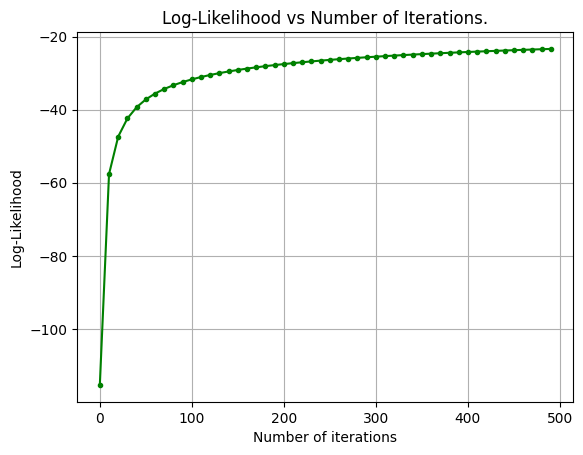

In [34]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,10))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Log-Likelihood')
plt.title("Log-Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)

You should see the likelihood increasing as number of Iterations increase.

### Predict the class label for every example in $X$ for a given ${\bf w}$ and $t$

In [35]:
# TODO - Given a set of examples write the function to compute predicted which class for each example: 0 if the probability of belonging to class  is < t and returns 1 otherwise) - 10 points
def predict_class(X, w, t):
    hyp = hypothesis(X, w)
    return np.where(hyp >= t, 1, 0)

In [36]:
grader.check("Q11")

NameError: name 'grader' is not defined

### Precision, recall and F1: Evaluating your hypothesis using the test dataset

In [37]:
# TODO Q12
# Preidct the class y_hat using X_test and w you just calculated if the threshold is t = 0.5

# First augment the test dataset with a column of ones.
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))
# Now predict the label of each example in your test set

y_hat = predict_class(X_test_1, w, 0.5)

In [38]:
grader.check("Q12")

NameError: name 'grader' is not defined

In [39]:
# TODO Q13
# Write the precision_recall function by first calculating: false_pos, false_neg and true_pos.  Using these numbers compute the precision and recall
def precision_recall(y_hat, y, threshold):

    # Calculate false positive and false negative
    # HINT: if done correctly, false_pos should be 1 and false_neg should be 1
    false_pos = np.where(y - y_hat == -1, 1, 0).sum()
    false_neg = np.where(y - y_hat == 1, 1, 0).sum()

    # Calculate true positive and true negatives
    # HINT: if done correctly, true_pos should be 88
    true_pos = np.where(y + y_hat == 2, 1, 0).sum()

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision, recall

(0.9887640449438202, 0.9887640449438202)

In [40]:
grader.check("Q13")

NameError: name 'grader' is not defined

In [41]:
# TODO Q14
# Calculate precision and recall using on the test data where the threshold is 0.5

precision, recall = precision_recall(predict_class(X_test_1, w, 0.5), y_2d_test, 0.5)

print('Q14 - precision: ', precision)
print('Q14 - recall: ', recall)

Q14 - precision:  0.9887640449438202
Q14 - recall:  0.9887640449438202


In [42]:
grader.check("Q14")

NameError: name 'grader' is not defined

In [43]:
# TODO Q15
# Write the F1_score function
def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [44]:
# Computing the F1 score on the test data set using the precision and recall you computed above.
f1_score(precision, recall)

0.9887640449438202

In [45]:
grader.check("Q15")

NameError: name 'grader' is not defined

# Sklearn's implementation of Logistic regression

Next, use Sklearn's implementation of Logistic regression.  Once you have your hypothesis you will use your model on the test data and then evaluate how well it did using Sklearn's built in functions to compute the accuracy, precision, recall and F1 score.

### Fitting Model using Sklearn Library. 

In [46]:
# TODO - Create object of logistic regression model. So we don't use any regularization, we can set the penalty to `none` or set C to a very large value (for example, C = 100000000), 
# to make lambda (C = 1/lambda) nearly 0.
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty = 'none')

In [47]:
grader.check("Q16")

NameError: name 'grader' is not defined

In [48]:
# TODO Q17
# Fit the model
# Don't use matrix X_train_1. Instead, use X_train.
logreg.fit(X_train, y_2d_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='none')

In [49]:
grader.check("Q17")

NameError: name 'grader' is not defined

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q19
manual: true
points:
  each: 1
-->

In [50]:
# TODO Q18
# Print out all the coefficients
w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

In [51]:
grader.check("Q19")

NameError: name 'grader' is not defined

<!-- END QUESTION -->

In [52]:
# VERIFY - Compare the parameters computed by logreg model and gradient ascent. They should be nearly same.
print('Q18 - w_logreg: ', w_logreg)
print('Q18 - intercept_logreg: ', intercept_logreg)

Q18 - w_logreg:  [[ 3.21265445e+01 -3.67500814e+01  8.96378206e+01  2.08510804e-01
  -6.62958810e+01  5.59451477e+02 -1.66230805e+02 -4.47828457e+02
   1.46775811e+02 -3.01305135e+02 -5.68784465e+02  9.19162884e+01
   1.05851940e+02 -3.31865228e+02 -9.81284297e+01 -1.36604335e+02
   8.95153556e+01 -1.94703588e+02  2.32709190e+02  3.83006543e+02
  -2.06734995e+02 -2.43403434e+02  1.34920487e+02 -2.11740414e+02
   1.60316007e+02  1.53893713e+02 -4.30161161e+02 -9.42312091e+01
  -4.14308722e+02  1.58362178e+01]]
Q18 - intercept_logreg:  [-71.38178004]


### Performance measure: accuracy

In [53]:
# TODO Q19
# Find the predicted values on test set (X_test not X_test_1) using logreg.predict
y_hat_logreg = logreg.predict(X_test)

# Find the accuracy achieved on test set using logreg.score and y_test 
acc_logreg = logreg.score(X_test, y_2d_test)

print("Q19 - Accuracy on training data = %f" % acc_logreg)

Q19 - Accuracy on training data = 0.944056


In [54]:
grader.check("Q18")

NameError: name 'grader' is not defined

### Performance Metrics: precision, recall, F1 score


In [55]:
from sklearn.metrics import precision_recall_fscore_support
# TODO Q20
# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn
# Using y_test and y_hat_logreg
prec, recal, fscore, sup = precision_recall_fscore_support(y_2d_test, y_hat_logreg)

In [56]:
grader.check("Q20")

NameError: name 'grader' is not defined

In [57]:
# VERIFY
print('Q20 - prec: ', prec)
print('Q20 - recal: ', recal)
print('Q20 - fscore: ', fscore)

Q20 - prec:  [0.88333333 0.98795181]
Q20 - recal:  [0.98148148 0.92134831]
Q20 - fscore:  [0.92982456 0.95348837]


# Experiment!  Run your gradient ascent algorithm without scaling the training dataset.  
What did you notice.  Describe the best hyperparamters  you found (i.e. `learning_rate`, and `num_iters`)

In [ ]:
# The best hyperparameters I found to train without scaling were learning_rate=0.01 and num_iters=1000. This gave a precision and recall of (0.9550561797752809, 0.9550561797752809)